<a href="https://colab.research.google.com/github/BeatrizPCandido/pretalab-ciclo14-git-github/blob/main/C%C3%B3pia_de_Aula_19_Estatistica_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conceitos Básicos de Estatística em Python

## Objetivos da aula
- Compreender os principais conceitos de estatística descritiva.  
- Calcular medidas de tendência central e dispersão usando Python.  
- Visualizar distribuições de dados com Pandas, NumPy e Matplotlib.  


## 1. Introdução à Estatística Descritiva

A **estatística descritiva** é o ramo da estatística que organiza, resume e interpreta conjuntos de dados.

## 2. Preparando o ambiente

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
plt.style.use('seaborn-v0_8-whitegrid')

## 3. Criando um conjunto de dados de exemplo

Vamos simular um conjunto de notas de alunas em uma disciplina.

In [2]:
# Gerar dados simulados de notas
np.random.seed(42)
notas = np.random.normal(loc=70, scale=10, size=50)  # média 70, desvio 10
df = pd.DataFrame({'nota': notas})

In [3]:
df.head()

,nota
0,74.967142
1,68.617357
2,76.476885
3,85.230299
4,67.658466


## Estatísticas Resumidas com Pandas

In [4]:
df.describe()

,nota
count,50.000000
mean,67.745261
std,9.336688
min,50.403299
25%,61.390209
50%,67.658548
75%,73.362756
max,88.522782


## 4. Medidas de Tendência Central

Essas medidas indicam valores típicos ou centrais de um conjunto de dados.

In [5]:
df['nota'].mean()

np.float64(67.7452609474386)

In [6]:
df['nota'].median()

67.65854834163741

In [7]:
df['nota'].mode()

,nota
0,50.403299
1,50.867198
2,52.369598
3,52.750822
4,55.214780
5,55.752518
6,55.876963
7,56.718140
8,57.791564
9,58.490064


### Interpretação:

Média: valor médio das notas.

Mediana: ponto central da distribuição (metade acima, metade abaixo).

Moda: valor mais frequente (útil para dados categóricos).

## 5. Medidas de Dispersão

Essas medidas mostram o quanto os dados variam em torno da média.

In [8]:
df['nota'].var()

87.17373942630934

In [9]:
df['nota'].std()

9.336687818831116

In [11]:
amplitude = df['nota'].max() - df['nota'].min()
amplitude

38.11948308388714

### Interpretação:

Variância: quanto as notas se afastam da média (em unidades²).

Desvio padrão: medida prática da dispersão, na mesma unidade da variável.

Amplitude: diferença entre o maior e o menor valor.

## 6. Medidas de Posição Relativa — Quartis e Percentis

Essas medidas dividem os dados em partes iguais.

In [12]:
# Medidas de Posição Relativa — Quartis e Percentis
# Essas medidas dividem os dados em partes iguais.
df['nota'].quantile([0.25, 0.5, 0.75])  # Q1, Q2 (mediana), Q3


,nota
0.25,61.390209
0.50,67.658548
0.75,73.362756


## 8. Medidas de Associação

A **covariância** mede se duas variáveis **variam juntas**.

In [13]:
# Exemplo: relação entre horas de estudo e nota
np.random.seed(42)
horas_estudo = np.random.normal(5, 1, 50)
notas = 60 + horas_estudo * 6 + np.random.normal(0, 3, 50)

**Correlação (Coeficiente de Pearson)**

A correlação é uma versão padronizada da covariância, variando entre -1 e +1.

In [14]:
# Correlação (Coeficiente de Pearson)
# A correlação é uma versão padronizada da covariância, variando entre -1 e +1
df_cov = pd.DataFrame({'horas_estudo': horas_estudo, 'nota': notas})
df_cov.corr()

,horas_estudo,nota
horas_estudo,1.000000,0.914448
nota,0.914448,1.000000


#### Interpretação:

+1: correlação positiva perfeita (ambas crescem juntas).

-1: correlação negativa perfeita (uma sobe e a outra desce).

0: sem correlação linear.

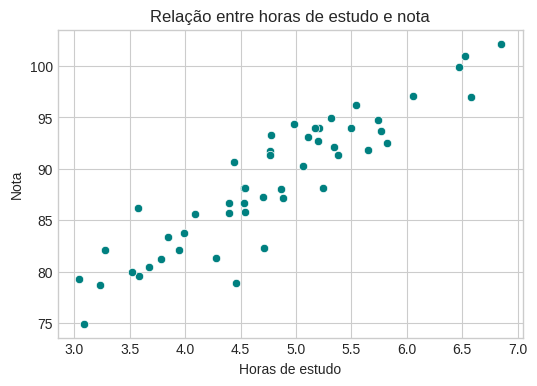

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='horas_estudo', y='nota', data=df_cov, color='teal')
plt.title('Relação entre horas de estudo e nota')
plt.xlabel('Horas de estudo')
plt.ylabel('Nota')
plt.show()

O gráfico de dispersão (scatter plot) mostra a direção e a força da relação:

Se os pontos formam uma linha inclinada para cima → correlação positiva.

Se formam uma linha inclinada para baixo → correlação negativa.

Se estão espalhados sem padrão → correlação próxima de zero.

💡 Dica prática

Use:

* .cov() para explorar como variáveis variam juntas;

* .corr() para medir quão forte é essa relação.

## 9. Visualização de Distribuições

### Histograma

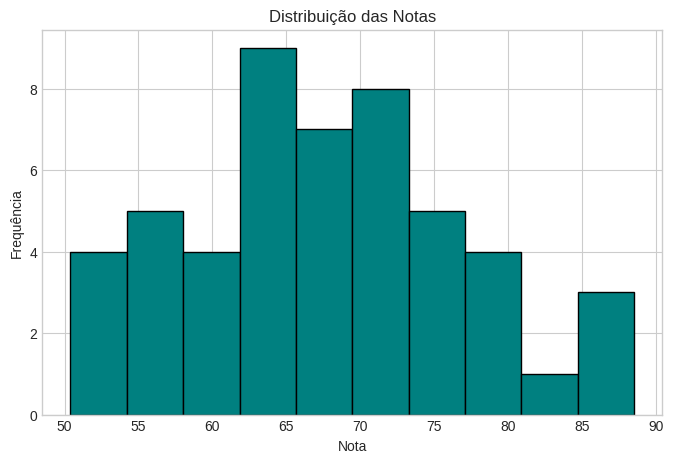

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['nota'], bins=10, color='teal', edgecolor='black')
plt.title('Distribuição das Notas')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

### Boxplot

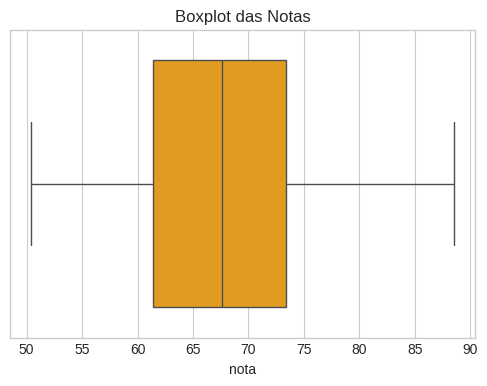

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['nota'], color='orange')
plt.title('Boxplot das Notas')
plt.show()

O gráfico resultante mostra:

A caixa (box) representa onde estão 50% dos dados centrais (entre Q1 e Q3).

A linha dentro da caixa indica a mediana (Q2).

Os “bigodes” (whiskers) mostram o alcance dos dados, até 1.5×IQR.

Os pontos isolados são outliers, ou seja, valores muito abaixo ou acima da tendência geral.

----

| Observação                                       | Interpretação                                         |
| ------------------------------------------------ | ----------------------------------------------------- |
| A caixa é estreita                               | Baixa dispersão (dados concentrados)                  |
| A caixa é larga                                  | Alta dispersão (dados bem espalhados)                 |
| A linha da mediana está próxima da base da caixa | Distribuição assimétrica à direita (média > mediana)  |
| A linha da mediana está próxima do topo da caixa | Distribuição assimétrica à esquerda (média < mediana) |
| Existem pontos fora dos “bigodes”                | Outliers (valores fora do padrão)                     |


## Exercícios Práticos
1. Calcule média, mediana e moda de um conjunto de idades:
idades = [23, 25, 31, 22, 28, 26, 30, 28, 22, 25, 29]

2. Gere 100 valores aleatórios com média 50 e desvio 8. Calcule a variância e o desvio padrão.

3. Gere um gráfico de histograma e um boxplot com esses dados.

4. Interprete o que cada gráfico indica sobre a distribuição e a dispersão dos dados.

In [24]:
import statistics as stats

# Lista de idades
idades = [23, 25, 31, 22, 28, 26, 30, 28, 22, 25, 29]

# Média
media = stats.mean(idades)

# Mediana
mediana = stats.median(idades)

# Moda
moda = stats.mode(idades)

print("Média:", media)
print("Mediana:", mediana)
print("Moda:", moda)

Média: 26.272727272727273
Mediana: 26
Moda: 25


In [28]:
idades =pd.Series([23, 25, 31, 22, 28, 26, 30, 28, 22, 25, 29])

In [29]:
#media
idades.mean()

np.float64(26.272727272727273)

In [30]:
#mediana
idades.median()


26.0

In [31]:
#moda
idades.mode()

,0
0,22
1,25
2,28


In [32]:
# Gere 100 valores aleatórios com média 50 e desvio 8. Calcule a variância e o desvio padrão.
valores = np.random.normal(loc=50, scale=8, size=100)
variancia = np.var(valores)
desvio_padrao = np.std(valores)
print("Variância:", variancia)
print("Desvio padrão:", desvio_padrao)


Variância: 74.4904112222947
Desvio padrão: 8.630782769963261


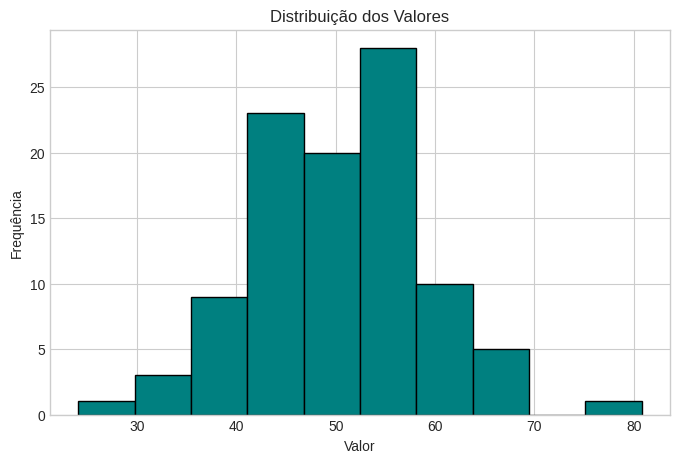

In [33]:
# Gere um gráfico de histograma e um boxplot com esses dados
plt.figure(figsize=(8,5))
plt.hist(valores, bins=10, color='teal', edgecolor='black')
plt.title('Distribuição dos Valores')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

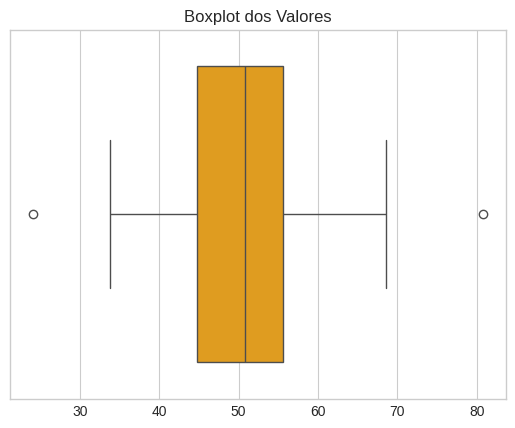

In [34]:
# Interprete o que cada gráfico indica sobre a distribuição e a dispersão dos dados.

sns.boxplot(x=valores, color='orange')
plt.title('Boxplot dos Valores')
plt.show()